This notebook has code to generate the parameter values and various analysis plots for understanding 2nd order RLC filters and 2 Stage Opamps.

In [62]:
def analyze_RLC(R, L, C):
    '''Find damping factor, quality factor, natural frequeny and poles for given RLC system'''
    from cmath import sqrt
    z = 0.5 * R * sqrt(C / L)
    Q = 1 / (2 * z)
    w = 1 / sqrt(L * C)
    p1 = w * (-z + sqrt(z**2 - 1))
    p2 = w * (-z - sqrt(z**2 - 1))
    return z, Q, w, p1, p2

In [63]:
from tabulate import tabulate
L = 10 * 10**(-6)
C = 10 * 10**(-6)
R_list = [0.02, 0.1, 0.4, 1, 1.4, 2, 5, 10, 20, 100]
results = []
for R in R_list:
    z, Q, w, p1, p2 = analyze_RLC(R, L, C)
    results.append([R, z, Q, w, p1, p2, p1.imag, p2.imag])
print(tabulate(results, headers = ["R", "z", "Q", "w", "p1", "p2", "wp1", "wp2"]))


     R  z          Q                        w                        p1                                        p2                                            wp1       wp2
------  ---------  -----------------------  -----------------------  ----------------------------------------  ----------------------------------------  -------  --------
  0.02  (0.01+0j)  (50+0j)                  (100000.00000000001+0j)  (-1000.0000000000001+99994.99987499377j)  (-1000.0000000000001-99994.99987499377j)  99995    -99995
  0.1   (0.05+0j)  (10+0j)                  (100000.00000000001+0j)  (-5000.000000000001+99874.9217771909j)    (-5000.000000000001-99874.9217771909j)    99874.9  -99874.9
  0.4   (0.2+0j)   (2.5+0j)                 (100000.00000000001+0j)  (-20000.000000000004+97979.58971132713j)  (-20000.000000000004-97979.58971132713j)  97979.6  -97979.6
  1     (0.5+0j)   (1+0j)                   (100000.00000000001+0j)  (-50000.00000000001+86602.54037844387j)   (-50000.00000000001-86602.5403784438

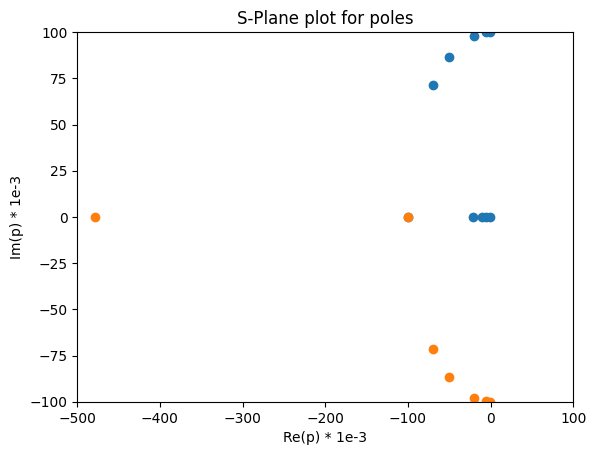

In [65]:
p1_values = [(result[4].real, result[4].imag) for result in results]
p2_values = [(result[5].real, result[5].imag) for result in results]
import matplotlib.pyplot as plt
plt.figure()
plt.title("S-Plane plot for poles")
plt.xlim(-500, 100) # Set limits for better visualization
plt.ylim(-100, 100) # Set limits for better visualization
plt.xlabel("Re(p) * 1e-3")
plt.ylabel("Im(p) * 1e-3")
plt.scatter([p1[0] * 1e-3 for p1 in p1_values], [p1[1] * 1e-3 for p1 in p1_values]) # Scaled for compact representation
plt.scatter([p2[0] * 1e-3 for p2 in p2_values], [p2[1] * 1e-3 for p2 in p2_values]) # Scaled for compact representation


In [72]:
import cmath

def analyze_opamp(wp1, wp2, A):
    '''Find loop gain and closed loop parameters of opamp'''
    w = cmath.sqrt(A * wp1 * wp2)
    z = (wp1 + wp2) / (2 * cmath.sqrt(A * wp1 * wp2))
    Q = 1/(2 * z)
    p1 = w * (-z + cmath.sqrt(z**2 - 1))
    p2 = w * (-z - cmath.sqrt(z**2 - 1))
    wp1cl = p1.imag
    wp2cl = p2.imag
    wugf = (0.5 * (-(wp1**2 + wp2**2) + cmath.sqrt((wp1**2-wp2**2)**2 + 4 * A**2 * wp1**2 * wp2**2)))**0.5
    pm = (cmath.atan(-wugf * (wp1 + wp2) / ((wp1*wp2) - (wugf**2))) * 180 / cmath.pi)
    
    return [wp1, wp2, wugf, pm, z, Q, wp1cl, wp2cl, p1, p2]

In [73]:
from tabulate import tabulate

wp1_list = [1e3, 1e2, 2.5e1, 1e1, 7.07e0, 5e0, 2e0,1e0,5e-1,1e-1]
wp2_list = [1e3,1e4,4e4,1e5,1.41e5,2e5,5e5,1e6,2e6,1e7]
A = 1e4
results = []

for i in range(len(wp1_list)):
    wp1 = wp1_list[i]
    wp2 = wp2_list[i]
    results.append(analyze_opamp(wp1, wp2, A))
print(tabulate(results, headers = ["wp1", "wp2", "wugf", "PM", "z", "Q", "wp1cl", "wp2cl", "p1cl", "p2cl"]))


    wp1         wp2  wugf                     PM                       z                        Q                           wp1cl     wp2cl  p1cl                            p2cl
-------  ----------  -----------------------  -----------------------  -----------------------  ------------------------  -------  --------  ------------------------------  ------------------------------
1000       1000      (99994.99987499375+0j)   (1.1459346897143052+0j)  (0.01+0j)                (50+0j)                   99995    -99995    (-1000+99994.99987499375j)      (-1000-99994.99987499375j)
 100      10000      (99750.2880909139+0j)    (5.7822332209242+0j)     (0.0505+0j)              (9.900990099009901+0j)    99872.4  -99872.4  (-5050+99872.40609898212j)      (-5050-99872.40609898212j)
  25      40000      (96083.02985318055+0j)   (22.617192368618888+0j)  (0.200125+0j)            (2.4984384759525295+0j)   97977    -97977    (-20012.5+97977.03732890681j)   (-20012.5-97977.03732890681j)
  10     100000

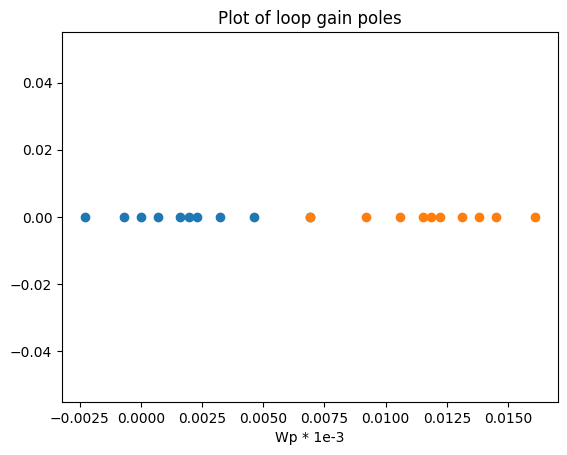

In [74]:
p1_values = [cmath.log(result[0]) for result in results]
p2_values = [cmath.log(result[1]) for result in results]
import matplotlib.pyplot as plt
plt.figure()
plt.title("Plot of loop gain poles")
# plt.xlim(-10, 1e6) # Set limits for better visualization
# plt.ylim(-100, 100) # Set limits for better visualization
plt.xlabel("Wp * 1e-3")
plt.scatter([p1 * 1e-3 for p1 in p1_values], [0]*len(p1_values)) # Scaled for compact representation
plt.scatter([p2 * 1e-3 for p2 in p2_values], [0]*len(p1_values)) # Scaled for compact representation


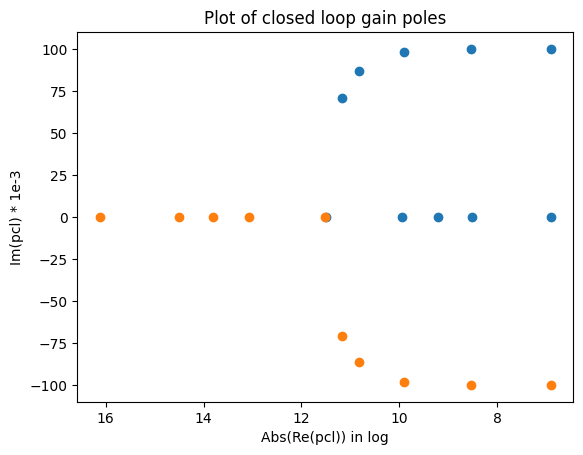

In [75]:
p1_values = [(result[8].real, result[8].imag) for result in results]
p2_values = [(result[9].real, result[9].imag) for result in results]
import matplotlib.pyplot as plt
plt.figure()
plt.title("Plot of closed loop gain poles")
plt.xlabel("Abs(Re(pcl)) in log")
plt.ylabel("Im(pcl) * 1e-3")
# plt.xlim(-500, 100) # Set limits for better visualization
# plt.ylim(-100, 100) # Set limits for better visualization
plt.scatter([cmath.log(abs(p1[0])) for p1 in p1_values], [p1[1] * 1e-3 for p1 in p1_values]) # Scaled for compact representation
plt.scatter([cmath.log(abs(p2[0])) for p2 in p2_values], [p2[1] * 1e-3 for p2 in p2_values]) # Scaled for compact representation
plt.gca().invert_xaxis()

C:\Users\Aadarsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


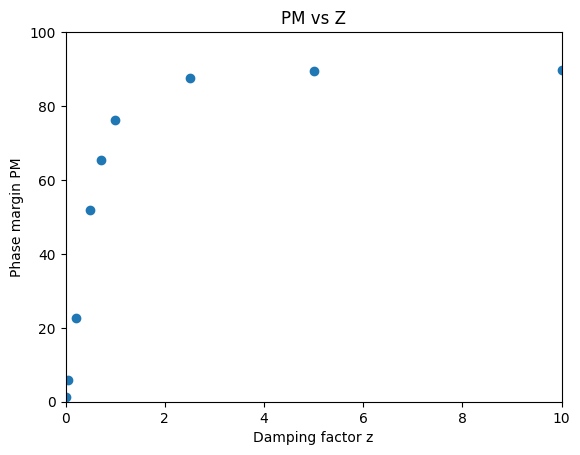

In [83]:
z_values = [result[4] for result in results]
pm_values = [result[3] for result in results]
plt.figure()
plt.title("PM vs Z")
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.xlabel("Damping factor z")
plt.ylabel("Phase margin PM")
plt.scatter(z_values, pm_values)